In [1]:
import numpy as np
from dataclasses import dataclass
import json
import glob
from ase.calculators.calculator import Calculator
from sch_benchmark.infer import compute_hutchison, compute_ionic_conformers, compute_rotamer, compute_tautobase, compute_all
from sch_benchmark.io import load_hutchison_task, load_ionic_conformers_task
import matplotlib.pyplot as plt


class FakeCalc(Calculator):

    def get_potential_energy(self, atoms, force_consistent=None):
        return 0.0

    def get_forces(self, atoms=None):
        return np.zeros((len(atoms), 3))

100%|██████████| 5958/5958 [00:00<00:00, 56890.24it/s]
/Users/xinyan/miniconda3/envs/dpforce/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/xinyan/miniconda3/envs/dpforce/lib/python3.10/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


QRNN-TB
median MAE: 0.6515  median R$^2$: 0.9248
SANI
median MAE: 1.4781  median R$^2$: 0.8569
GFN2-xTB
median MAE: 1.3608  median R$^2$: 0.6200
PM7
median MAE: 2.4581  median R$^2$: 0.2392
wB97X-D/6-31G*
median MAE: 0.6312  median R$^2$: 0.9339
fake
median MAE: 2.3378  median R$^2$: nan


  0%|          | 0/1649 [00:00<?, ?it/s]

       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:10:58        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:10:58        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:10:58        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:10:58        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:10:58        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:10:58        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
L

 22%|██▏       | 359/1649 [00:00<00:00, 3587.74it/s]

       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:10:58        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:10:58        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:10:58        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:10:58        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:10:58        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:10:58        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
L

 44%|████▎     | 718/1649 [00:00<00:00, 2506.83it/s]

       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:10:58        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:10:58        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:10:58        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:10:58        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:10:58        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:10:58        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
L

 60%|█████▉    | 988/1649 [00:00<00:00, 2389.68it/s]

       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:10:58        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:10:58        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:10:58        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:10:58        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:10:58        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:10:58        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
L

 75%|███████▌  | 1237/1649 [00:00<00:00, 2131.62it/s]

       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:10:58        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:10:58        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:10:58        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:10:58        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:10:58        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:10:58        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
L

 95%|█████████▌| 1571/1649 [00:00<00:00, 2481.71it/s]

       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:10:58        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:10:58        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:10:58        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:10:58        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:10:58        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:10:58        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
L

100%|██████████| 1649/1649 [00:00<00:00, 2357.87it/s]

QRNN
geom mean RMSD: 0.2595
ener mean RMSD: 0.9660  ener median R$^2$: 0.9565
QRNN-TB
geom mean RMSD: 0.2380
ener mean RMSD: 0.8202  ener median R$^2$: 0.9804
SANI
geom mean RMSD: 0.3423
ener mean RMSD: 1.9562  ener median R$^2$: 0.7700
GFN2-xTB
geom mean RMSD: 0.4414
ener mean RMSD: 2.0422  ener median R$^2$: 0.7929
PM7
geom mean RMSD: 0.3367
ener mean RMSD: 2.1340  ener median R$^2$: 0.7096
fake
geom mean RMSD: 0.0000
ener mean RMSD: 3.3053  ener median R$^2$: nan


100%|██████████| 1552/1552 [00:00<00:00, 33296.13it/s]


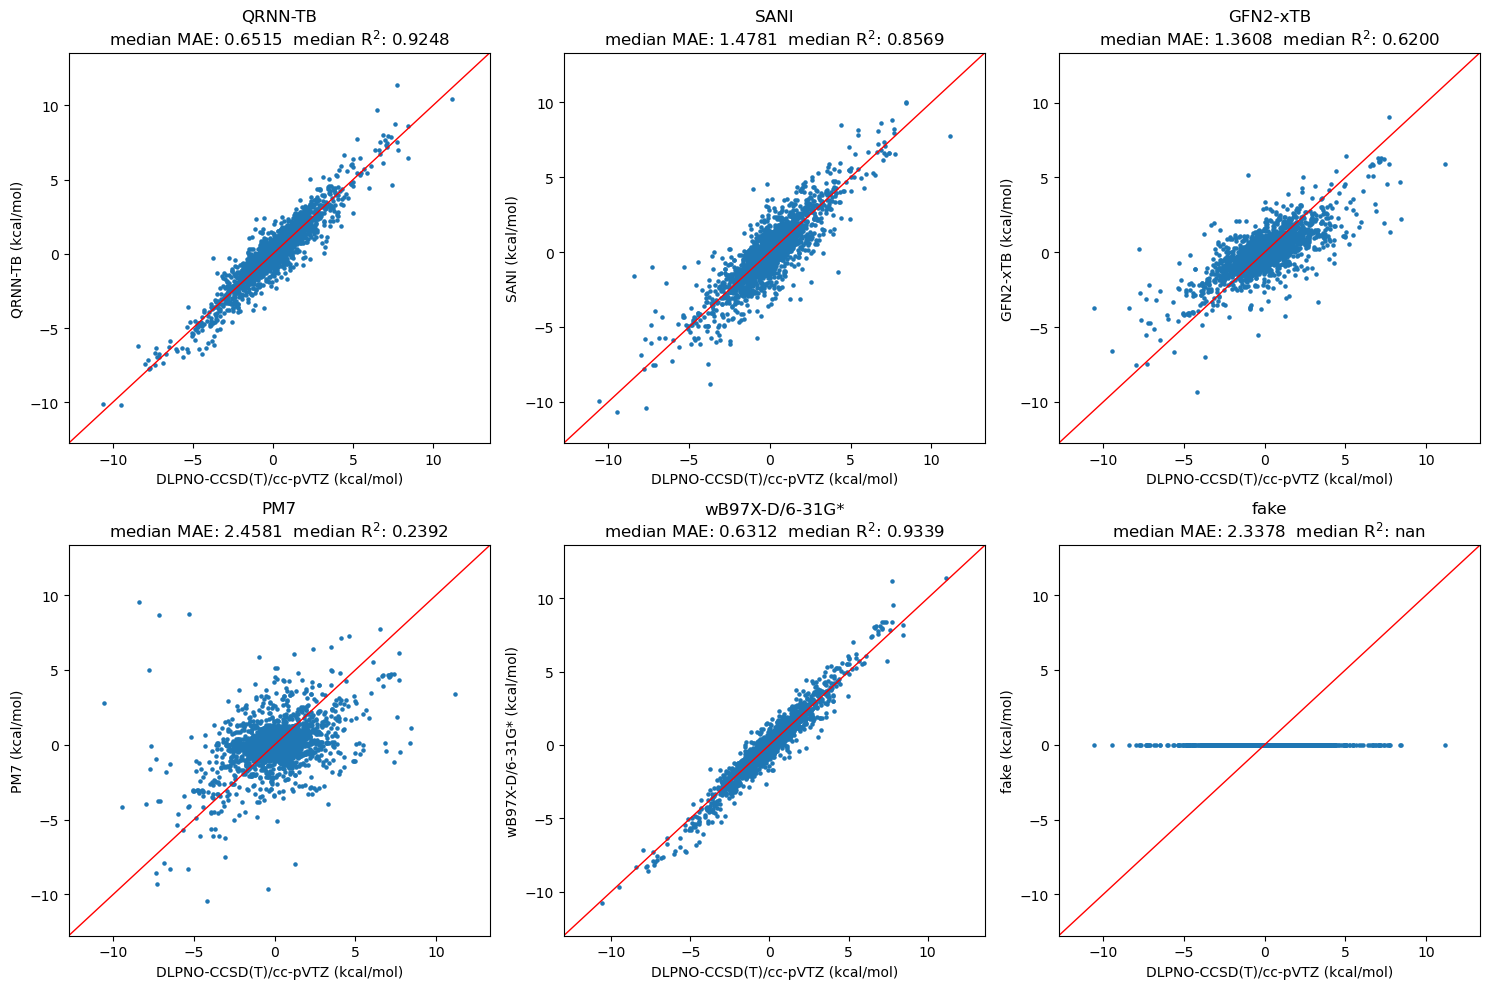

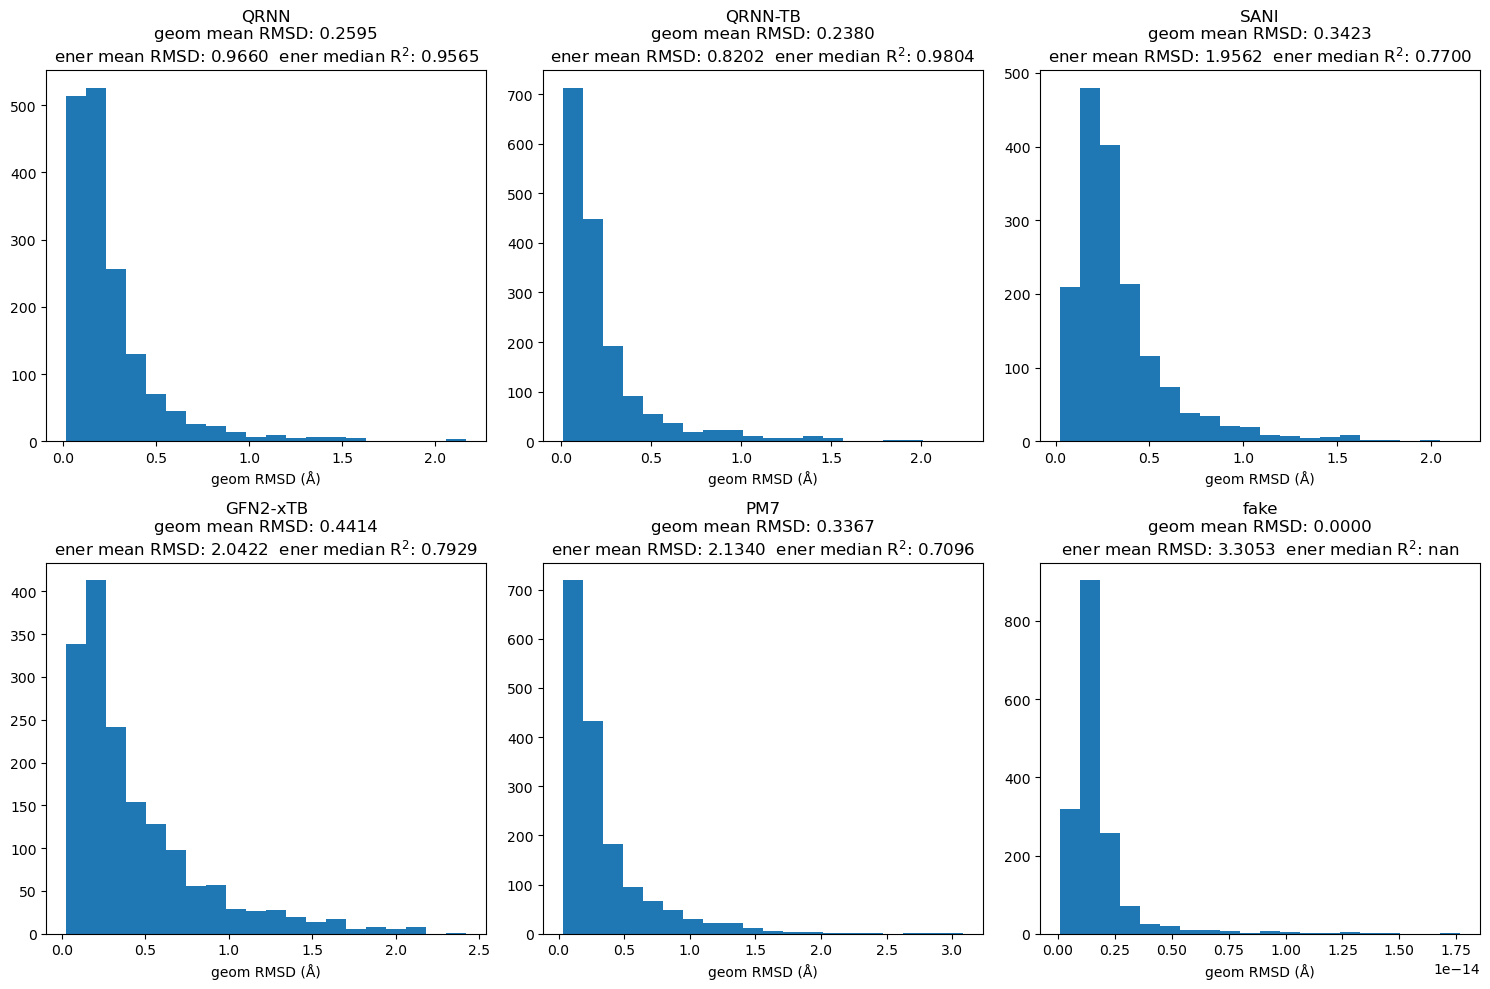

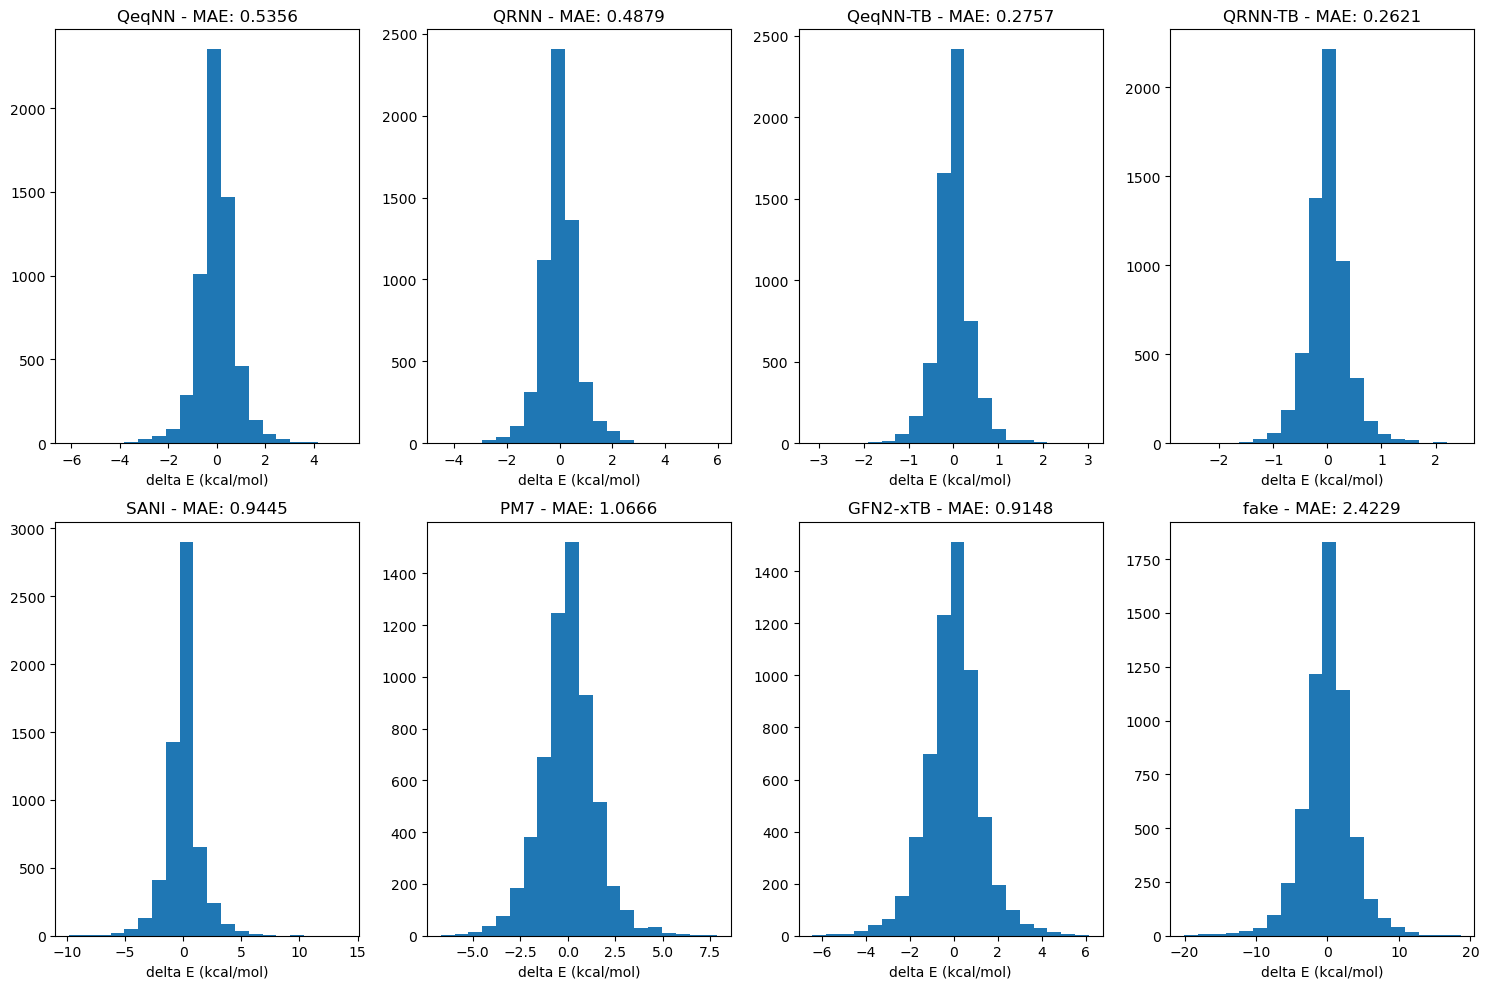

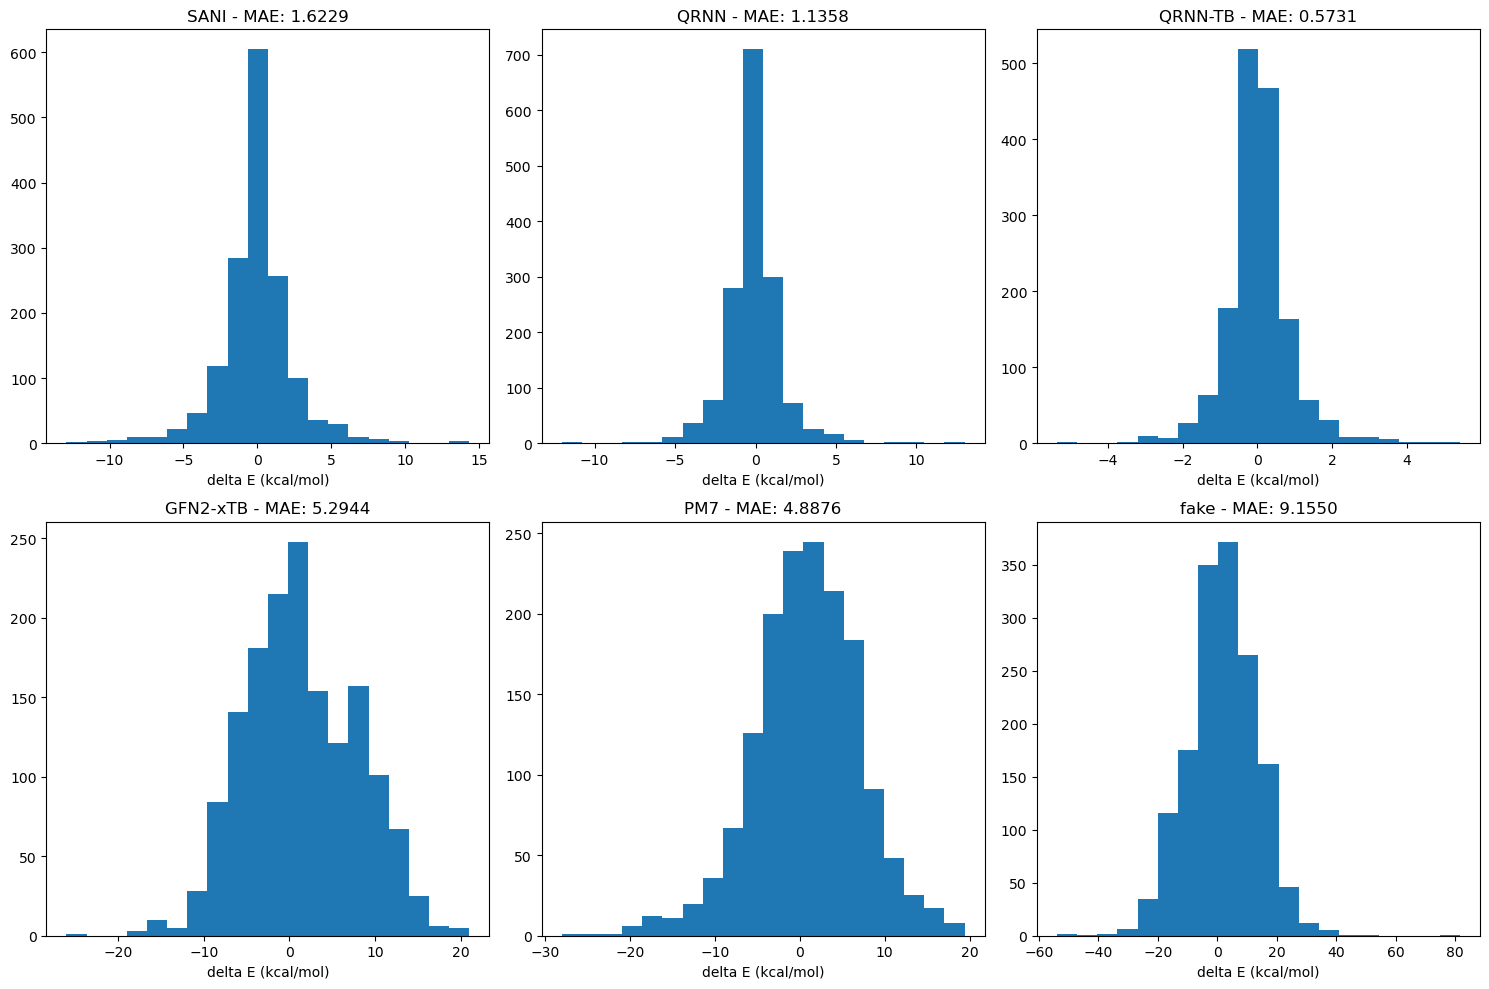

In [2]:
calc = FakeCalc()

compute_all(calc, name="fake")

  0%|          | 0/1649 [00:00<?, ?it/s]

       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:09:13        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:09:13        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:09:13        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:09:13        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:09:13        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:09:13        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
L

 24%|██▎       | 390/1649 [00:00<00:00, 3887.87it/s]

       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:09:14        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:09:14        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:09:14        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:09:14        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:09:14        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:09:14        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
L

 47%|████▋     | 779/1649 [00:00<00:00, 2666.51it/s]

       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:09:14        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:09:14        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:09:14        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:09:14        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:09:14        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:09:14        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
L

 65%|██████▍   | 1068/1649 [00:00<00:00, 2058.05it/s]

       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:09:14        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:09:14        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:09:14        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:09:14        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:09:14        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:09:14        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
L

 86%|████████▌ | 1412/1649 [00:00<00:00, 2444.97it/s]

       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:09:14        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:09:14        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:09:14        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:09:14        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:09:14        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 00:09:14        0.000000*       0.0000
       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
L

100%|██████████| 1649/1649 [00:00<00:00, 2518.86it/s]

QRNN
geom mean RMSD: 0.2595
ener mean RMSD: 0.9660  ener median R$^2$: 0.9565
QRNN-TB
geom mean RMSD: 0.2380
ener mean RMSD: 0.8202  ener median R$^2$: 0.9804
SANI
geom mean RMSD: 0.3423
ener mean RMSD: 1.9562  ener median R$^2$: 0.7700
GFN2-xTB
geom mean RMSD: 0.4414
ener mean RMSD: 2.0422  ener median R$^2$: 0.7929
PM7
geom mean RMSD: 0.3367
ener mean RMSD: 2.1340  ener median R$^2$: 0.7096
fake
geom mean RMSD: 0.0000
ener mean RMSD: 3.3053  ener median R$^2$: nan


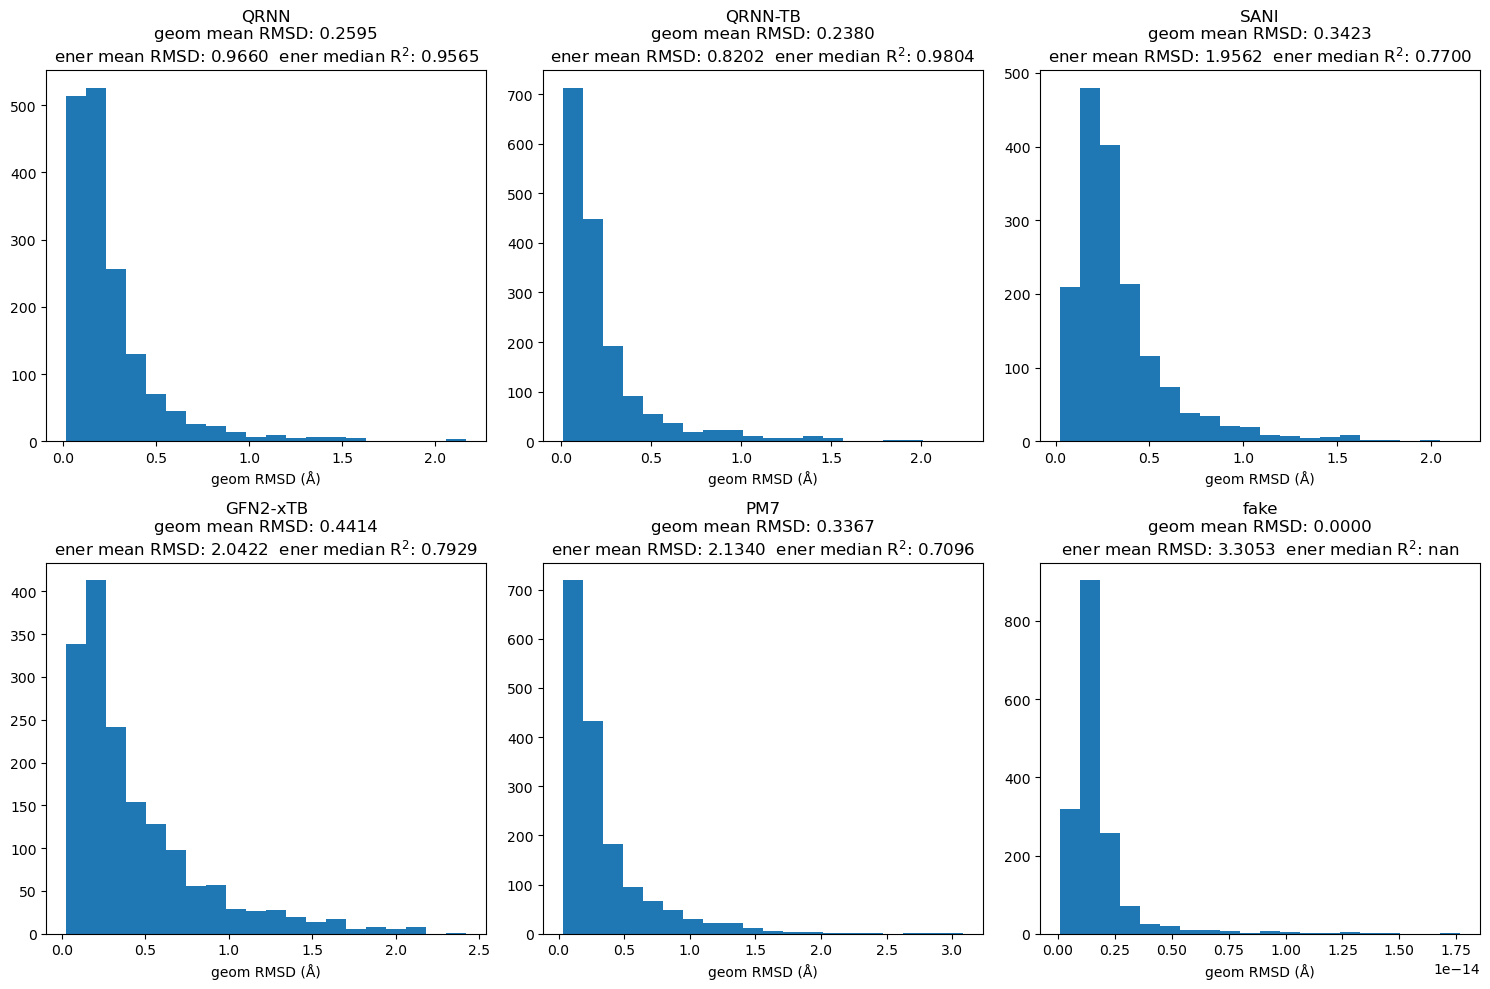

In [3]:
_ = compute_ionic_conformers(calculator=calc, name="fake")

100%|██████████| 500/500 [00:00<00:00, 5651.70it/s]


[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

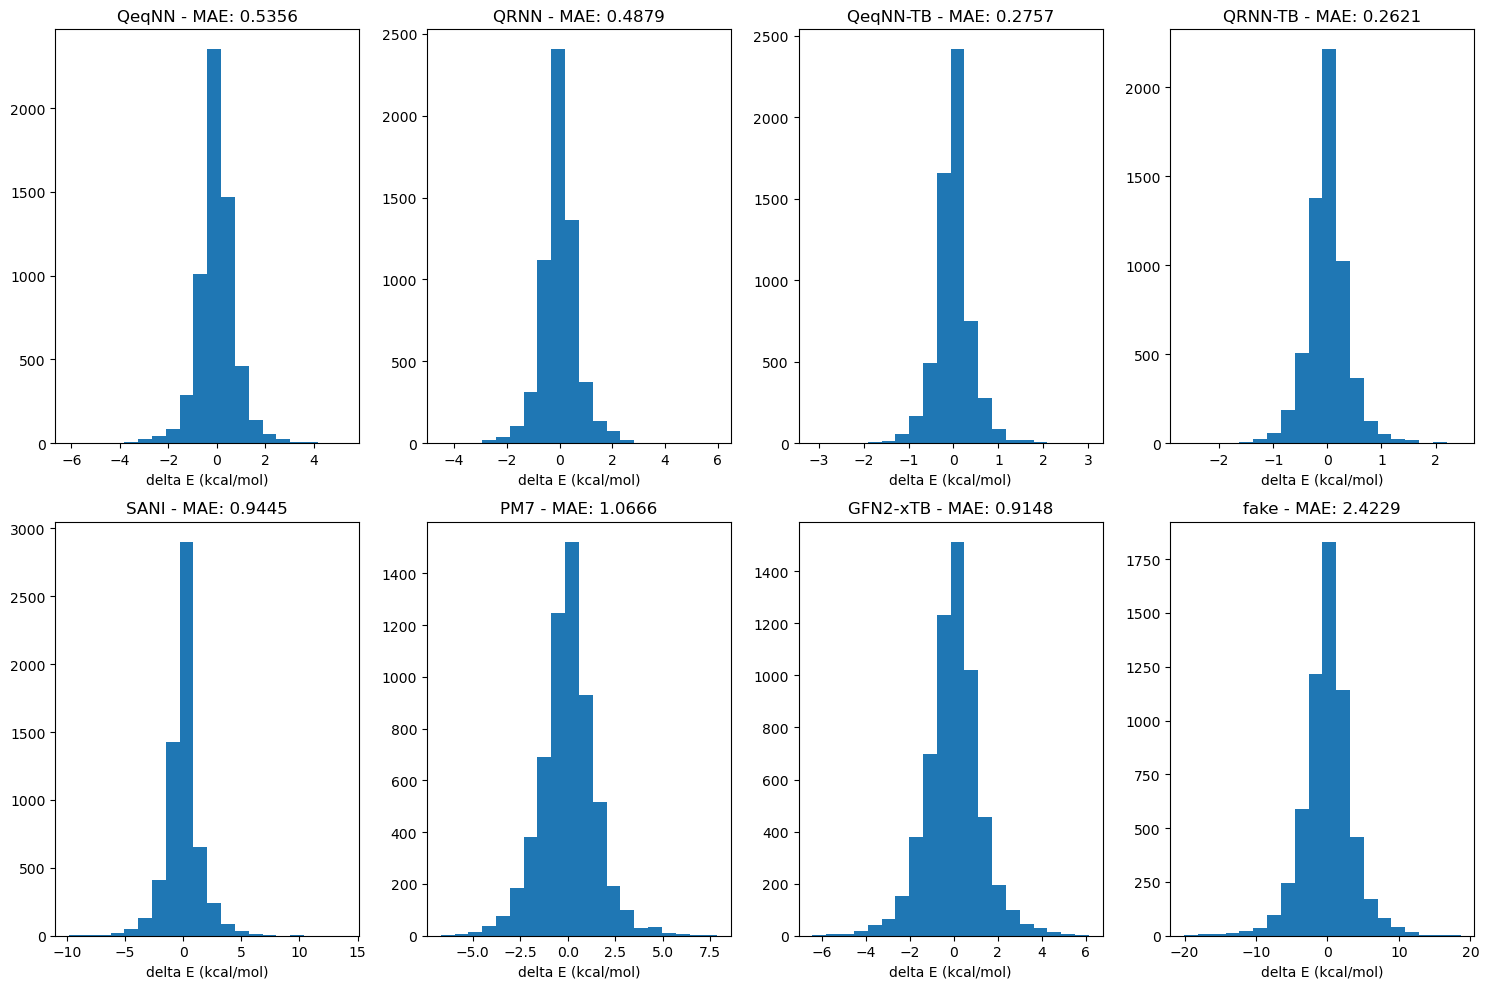

In [4]:
compute_rotamer(calculator=calc, name="fake")

100%|██████████| 1552/1552 [00:00<00:00, 33819.23it/s]


[[0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],

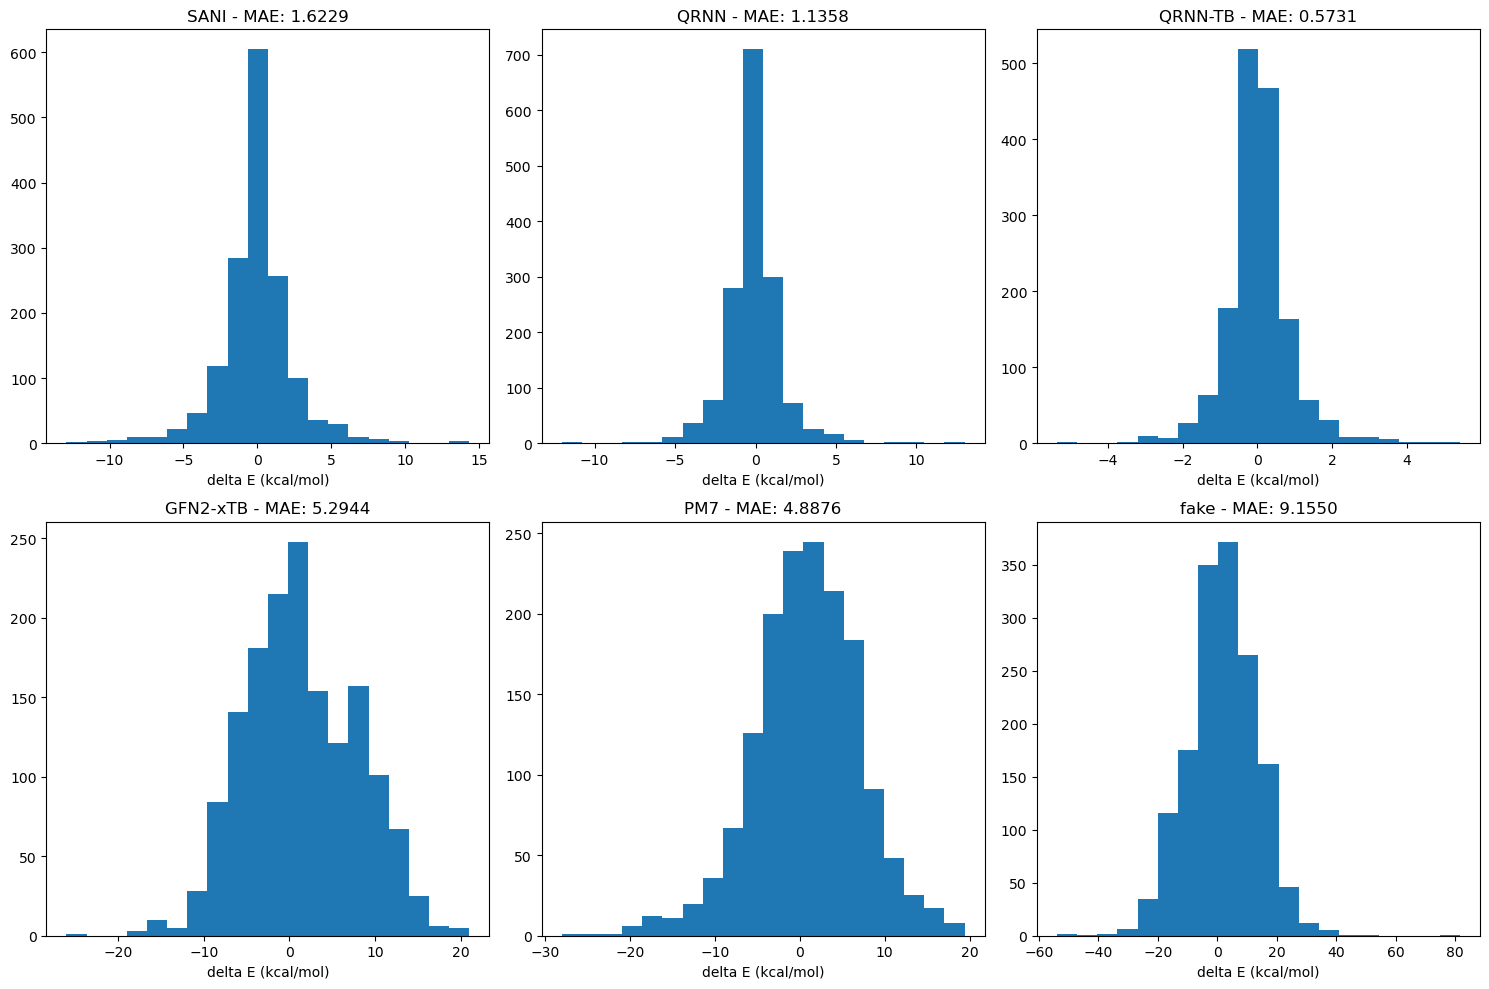

In [5]:
compute_tautobase(calculator=calc, name="fake")

In [8]:
import numpy as np
from sch_benchmark.io import load_hutchison_task
from sch_benchmark.tools import group_by_elements, group_by_smiles, analyse_by_group

In [5]:
ionic = load_ionic_conformers_task()

In [9]:
smiles = [i["QeqNN"].smiles for i in ionic]
group = group_by_smiles(smiles)

In [12]:
for ni, i in enumerate(smiles):
    if group[ni] == 3:
        print(i)

O=C1[C@H]([NH3+])[C@H](C)N1P([O-])(=O)O


In [2]:
import numpy as np
from sch_benchmark.io import load_hutchison_task
from sch_benchmark.tools import group_by_elements, group_by_smiles, analyse_by_group

0.9338773608905219
0.6312230353082668


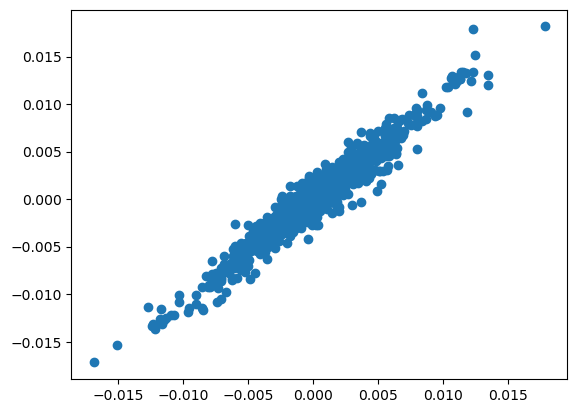

In [3]:
hu = load_hutchison_task()
hu = [i for i in hu if i.charge == 0]
dlpno = [i.energies["DLPNO-CCSD(T)/cc-pVTZ"] for i in hu]
wb = [i.energies["wB97X-D/6-31G*"] for i in hu]
dlpno = np.array(dlpno)
wb = np.array(wb)

elems = [i.elements for i in hu]
smiles = [i.smiles for i in hu]
# groups = group_by_elements(elems)
groups = group_by_smiles(smiles)

def unbias_by_group(val: np.ndarray, ref: np.ndarray, groups):
    diff_grps = list(set(groups))
    new_val = np.zeros_like(val)
    new_ref = np.zeros_like(ref)
    groups = np.array(groups)
    for grp in diff_grps:
        idx = np.where(groups == grp)[0]
        if len(idx) < 3:
            print(f"WARNING: group {grp} size is {len(idx)}")
            continue
        new_val[idx] = val[idx] - val[idx].mean()
        new_ref[idx] = ref[idx] - ref[idx].mean()
    return new_val, new_ref

mae, r2, dlpno_, wb_ = analyse_by_group(dlpno, wb, groups)
print(np.median(r2))
print(np.median(mae) * 627.5)

plt.scatter(dlpno_, wb_)